# Regression Data Set for ToyotaCorolla

## Data in-set and Preprocessing

In [82]:
import warnings
warnings.filterwarnings("ignore")

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler,PolynomialFeatures, MinMaxScaler
from termcolor import colored
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,accuracy_score
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
import seaborn as sns

def prRed(skk): print("\033[1m \033[91m {}\033[00m" .format(skk)) 
def prGreen(skk): print("\033[1m \033[92m {}\033[00m" .format(skk)) 
def prYellow(skk): print("\033[1m \033[93m {}\033[00m" .format(skk)) 
def prBlack(skk): print("\033[1m \033[98m {}\033[00m" .format(skk)) 

In [84]:
corolla = pd.read_csv('https://raw.githubusercontent.com/bharanianand/Toyota-Corolla/master/ToyotaCorolla_ML_Dataset.csv')
corolla.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,NaN,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,NaN,1,...,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90.0,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90.0,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90.0,0,...,1,1,1,0,1,0,1,0,0,0


##### NULL VALUES
We have null values in these columns - 'HP' , 'cc' , 'Doors', 'Cylinders', 'Gears', 'Weight'. )

In [85]:
corolla.isnull().sum()



Id                   0
Model                0
Price                0
Age_08_04            0
Mfg_Month            0
Mfg_Year             0
KM                   0
Fuel_Type            0
HP                  70
Met_Color            0
Automatic            0
cc                  51
Doors               12
Cylinders           38
Gears               18
Quarterly_Tax        0
Weight               5
Mfr_Guarantee        0
BOVAG_Guarantee      0
Guarantee_Period     0
ABS                  0
Airbag_1             0
Airbag_2             0
Airco                0
Automatic_airco      0
Boardcomputer        0
CD_Player            0
Central_Lock         0
Powered_Windows      0
Power_Steering       0
Radio                0
Mistlamps            0
Sport_Model          0
Backseat_Divider     0
Metallic_Rim         0
Radio_cassette       0
Tow_Bar              0
dtype: int64

### Before imputing the data, Let's visualize some based on general sense which can affect the price of the car.

#### 1. Price itself over boxplot

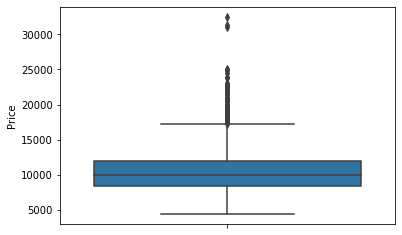

In [86]:
sns.boxplot(corolla['Price'],orient='v')

#### 2. Fuel Type

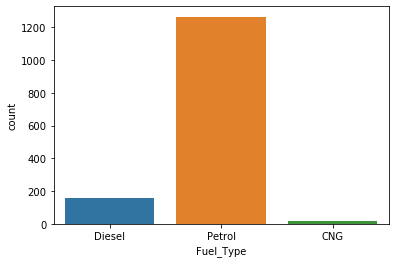

In [87]:
sns.countplot(corolla['Fuel_Type'])

### 3. Age

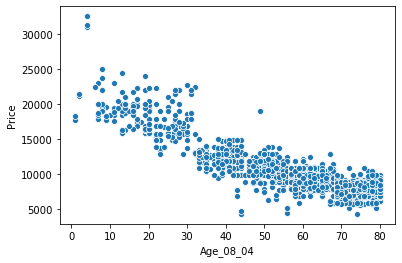

In [88]:
sns.scatterplot(corolla['Age_08_04'], corolla['Price'])

### 4. HorsePower

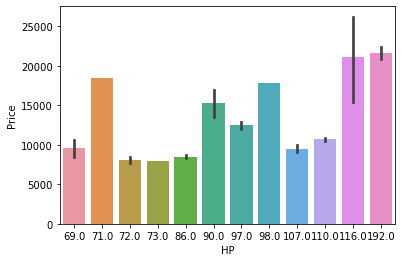

In [89]:
sns.barplot(corolla['HP'], corolla['Price'])

### 5. CC

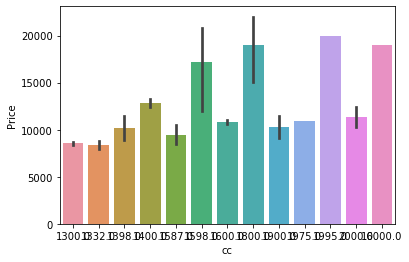

In [90]:
sns.barplot(corolla['cc'], corolla['Price'])

### To impute null values, best categorical column to groupby would be 'Fuel_type'

In [91]:
g_corolla = corolla.groupby(['Fuel_Type'])
g_corolla.first()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
Fuel_Type,,,,,,,,,,,,,,,,,,,,,
CNG,191,TOYOTA Corolla 1.6 16V VVT I HATCHB TERRA 2/3-...,7750,43,2,2001,178858,110.0,0,0,...,0,0,1,1,0,0,1,0,1,0
Diesel,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,90.0,1,0,...,1,1,1,0,0,0,1,0,0,0
Petrol,9,?TOYOTA Corolla 1800 T SPORT VVT I 2/3-Doors,21500,27,6,2002,19700,192.0,0,0,...,1,1,1,1,0,0,0,1,1,0


In [92]:
g1_corolla = g_corolla.transform(lambda grp: grp.fillna(grp.mean()))

In [93]:
g1_corolla

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,13500,23,10,2002,46986,78.306452,1,0,2000.0,...,1,1,1,0,0,0,1,0,0,0
1,2,13750,23,10,2002,72937,78.306452,1,0,2000.0,...,1,0,1,0,0,0,1,0,0,0
2,3,13950,24,9,2002,41711,90.000000,1,0,2000.0,...,0,0,1,0,0,0,1,0,0,0
3,4,14950,26,7,2002,48000,90.000000,0,0,2000.0,...,0,0,1,0,0,0,1,0,0,0
4,5,13750,30,3,2002,38500,90.000000,0,0,2000.0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,7500,69,12,1998,20544,86.000000,1,0,1300.0,...,1,1,1,0,1,1,1,0,0,0
1432,1439,10845,72,9,1998,19000,86.000000,0,0,1300.0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,8500,71,10,1998,17016,86.000000,0,0,1300.0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,7250,70,11,1998,16916,86.000000,1,0,1300.0,...,0,0,0,0,0,0,1,0,0,0


##### Group transformation with mean values in the above 6 columns

In [94]:
g1_corolla['HP']=(g_corolla['HP'].apply(lambda grp:grp.fillna(grp.mean())))

In [95]:
g1_corolla['cc']=(g_corolla['cc'].apply(lambda grp:grp.fillna(grp.mean())))


In [96]:
g1_corolla['Doors']=(g_corolla['Doors'].apply(lambda grp:grp.fillna(grp.median())))


In [97]:
g1_corolla['Cylinders']=(g_corolla['Cylinders'].apply(lambda grp:grp.fillna(grp.median())))


In [98]:
g1_corolla['Gears']=(g_corolla['Gears'].apply(lambda grp:grp.fillna(grp.median())))


In [99]:
g1_corolla['Weight']=(g_corolla['Weight'].apply(lambda grp:grp.fillna(grp.mean())))


In [100]:

#del(g1_corolla)

In [101]:
#cor_dum = pd.get_dummies(g1_corolla['Fuel_Type'])
g1_corolla= pd.concat([g1_corolla,corolla['Fuel_Type']], axis=1)


In [102]:
g1_corolla = pd.get_dummies(g1_corolla)

In [103]:
y1 = g1_corolla['Price']

In [104]:
g1_corolla.drop('Price', axis=1, inplace=True) #Since it's target variable

In [105]:
g1_corolla.head()

,Id,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,1,23,10,2002,46986,78.306452,1,0,2000.0,3.0,...,0,0,0,1,0,0,0,0,1,0
1,2,23,10,2002,72937,78.306452,1,0,2000.0,3.0,...,0,0,0,1,0,0,0,0,1,0
2,3,24,9,2002,41711,90.000000,1,0,2000.0,3.0,...,0,0,0,1,0,0,0,0,1,0
3,4,26,7,2002,48000,90.000000,0,0,2000.0,3.0,...,0,0,0,1,0,0,0,0,1,0
4,5,30,3,2002,38500,90.000000,0,0,2000.0,3.0,...,0,1,0,1,0,0,0,0,1,0


In [106]:
#Selected Standardscaler because of high variance and size of the data

In [107]:
X_train_org, X_test_org, y_train, y_test = train_test_split(g1_corolla,y1,test_size=0.25, random_state=0)

In [108]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train_org)
X_test = sc.transform(X_test_org)

In [109]:
mm = MinMaxScaler()
X_train1 = mm.fit_transform(X_train_org)
X_test1  = mm.transform(X_test_org)

### REGRESSION MODELS


#####  LINEAR REGRESSION

In [110]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X_train, y_train)

prRed("\nLINEAR REGRESSION")
lreg_score_train = lreg.score(X_train, y_train)
lreg_score_test = lreg.score(X_test, y_test)
print("\nTrain score -->",lreg_score_train)
print("Test score  -->",lreg_score_test)
y_pred_test = lreg.predict(X_test)
rmse_lreg = np.sqrt(mean_squared_error(y_pred_test, y_test)**2)
print("RMSE LREG   -->",rmse_lreg)

  
LINEAR REGRESSION

Train score --> 0.9228572839032373
Test score  --> 0.71740670064515
RMSE LREG   --> 3274080.2091022553


Data is linearly correlated!


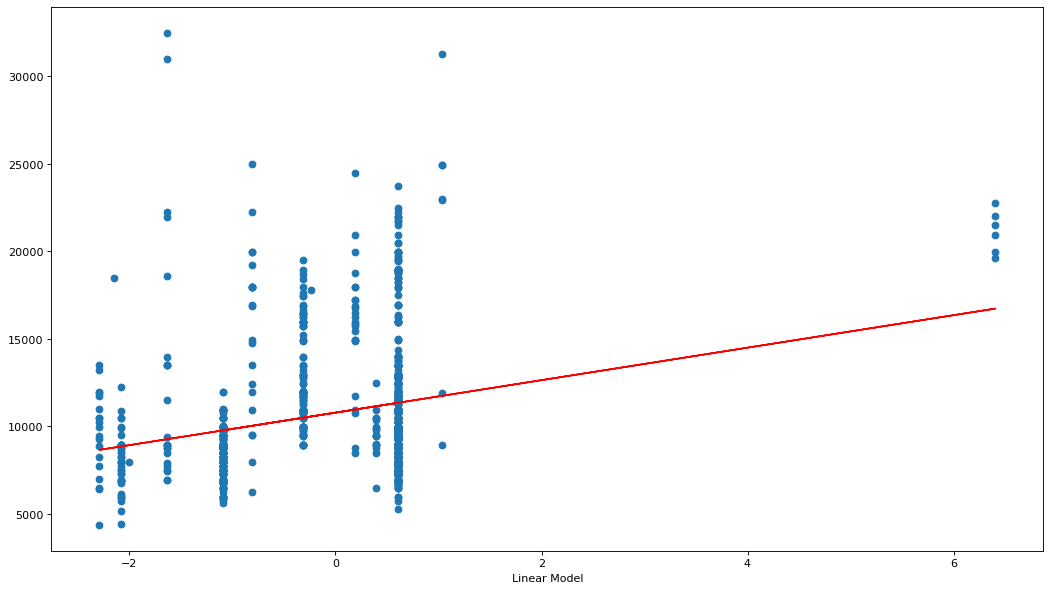

In [111]:
%matplotlib inline
import matplotlib.pyplot as plt

X_train_rm = X_train[:,5].reshape(-1,1)
lreg.fit(X_train_rm, y_train)
y_predict = lreg.predict(X_train_rm)
plt.figure(figsize=(16, 9), dpi=80)
plt.plot(X_train_rm, y_predict, c = 'r')
plt.scatter(X_train_rm,y_train)
plt.xlabel('Linear Model')
print("Data is linearly correlated!")


##### RIDGE REGRESSION

In [112]:
#RIDGE
ridge_params = {'alpha':[0.005, 0.02, 0.03, 0.05, 0.06, 0.5, 1, 5, 10, 15]}
#We can build Grid Search model using the above parameters. 

grid_search = GridSearchCV(linear_model.Ridge(random_state=0), ridge_params, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
prRed("\nRIDGE REGRESSION")
print("\nBest tuning parameter from grid search -->" ,grid_search.best_params_)

ridge_score_train = grid_search.score(X_train,y_train)
ridge_score_test = grid_search.score(X_test,y_test)
print("\nTrain score -->", ridge_score_train)
print("Test score  -->", )
y_pred_test = grid_search.predict(X_test)
rmse_ridge = np.sqrt(mean_squared_error(y_pred_test, y_test)**2)
print("RMSE RIDGE  -->",rmse_ridge)
#Cross validation for mean score
for alpha in [0.005, 0.02, 0.03, 0.05, 0.06, 0.5, 1, 5, 10, 15]:
    train_scores = []
    test_scores = []
    train_scores.append(cross_val_score(grid_search,X_train,y_train,cv=5))
    test_scores.append(cross_val_score(grid_search,X_test,y_test,cv=5))
prRed('\nRIDGE CROSS VALIDATION')   
print("\nMean Train score -->",np.mean(train_scores))
print("Mean Test score  -->",np.mean(test_scores))

  
RIDGE REGRESSION

Best tuning parameter from grid search --> {'alpha': 15}

Train score --> 0.9222948217973407
Test score  -->
RMSE RIDGE  --> 2799453.6477232557
  
RIDGE CROSS VALIDATION

Mean Train score --> 0.9010640797723528
Mean Test score  --> 0.4920287956948136


#####  LASSO REGRESSION

In [113]:
#LASSO
lasso_params = {'alpha':[0.005, 0.02, 0.03, 0.05, 0.06, 0.5, 1, 5, 10, 15]}
#We can build Grid Search model using the above parameters. 

grid_search = GridSearchCV(linear_model.Lasso(random_state=0), lasso_params, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
prGreen("\nLASSO REGRESSION")
print("Best tuning parameter from grid search -->" ,grid_search.best_params_)

lasso_score_train = grid_search.score(X_train,y_train) 
lasso_score_test = grid_search.score(X_test,y_test)
print("\nTrain score -->",lasso_score_train)
print("Test score  -->", lasso_score_test)
y_pred_test = grid_search.predict(X_test)
rmse_lasso = np.sqrt(mean_squared_error(y_pred_test, y_test)**2)
print("RMSE LASSO  -->",rmse_ridge)
#Cross validation for mean score
for alpha in [0.005, 0.02, 0.03, 0.05, 0.06, 0.5, 1, 5, 10, 15]:
    train_scores = []
    test_scores = []
    train_scores.append(cross_val_score(grid_search,X_train,y_train,cv=5))
    test_scores.append(cross_val_score(grid_search,X_test,y_test,cv=5))
prGreen("\nLASSO CROSS VALIDATION")      
print("\nMean Train score -->",np.mean(train_scores))
print("Mean Test score  -->",np.mean(test_scores))

  
LASSO REGRESSION
Best tuning parameter from grid search --> {'alpha': 5}

Train score --> 0.9226435305814005
Test score  --> 0.7484525214900198
RMSE LASSO  --> 2799453.6477232557
  
LASSO CROSS VALIDATION

Mean Train score --> 0.899811595443696
Mean Test score  --> 0.3645854417000491


### POLYNOMIAL REGRESSION


### Though we saw that data is linear, let's check how does the score varies on transforming linear data via polynomial features.

In [123]:
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))
param_grid = {'polynomialfeatures__degree': np.arange(4), 'linearregression__fit_intercept': [True, False], 'linearregression__normalize': [True, False]}
poly_grid = GridSearchCV(PolynomialRegression(), param_grid, cv=5)
poly_grid.fit(X_train, y_train)

print("Best degree -->",poly_grid.best_params_['polynomialfeatures__degree'])
print("Best score -->",poly_grid.best_score_)

    

Best degree --> 1
Best score --> 0.8993679661343684


In [124]:
poly_score_train = poly_grid.score(X_train,y_train)
poly_score_test = poly_grid.score(X_test,y_test)

print("Train",poly_score_train)
print("Test", poly_score_test)

Train 0.9228580630942131
Test 0.717654384560193


In [125]:
y_pred_poly_test = poly_grid.predict(X_test)
rmse_poly = np.sqrt(mean_squared_error(y_pred_poly_test, y_test)**2)
print("RMSE POLY  -->",rmse_poly)

RMSE POLY  --> 3271210.5833672974


In [126]:
poly_train_score = []
poly_test_score =[]
poly_train_score.append(cross_val_score(poly_grid,X_train,y_train,cv=5))


In [127]:
prRed("\nPOLYNOMIAL CROSS VALIDATION")      
print("\nMean Train score -->",np.mean(poly_train_score))
print("Mean Test score  -->",np.mean(poly_test_score))

  
POLYNOMIAL CROSS VALIDATION

Mean Train score --> 0.7304373325428043
Mean Test score  --> nan


### KNN Regressor

In [128]:
k_range = list(range(1,10))
weight_options = ["uniform", "distance"]

param_grid = dict(n_neighbors = k_range)
#print (param_grid)
knn = KNeighborsRegressor()

grid = GridSearchCV(knn, param_grid, cv = 5)
grid.fit(X_train,y_train)
print (grid.best_params_)
print (grid.best_estimator_)

knn_reg = KNeighborsRegressor(grid.best_params_['n_neighbors'])
knn_reg.fit(X_train, y_train)
knn_reg_train_score=knn_reg.score(X_train, y_train)
knn_reg_test_score= knn_reg.score(X_test, y_test)
y_pred_test = knn_reg.predict(X_test)
rmse_knn = np.sqrt(mean_squared_error(y_pred_test, y_test)**2)
print("RMSE kNN Regressor  -->",rmse_knn)
for k in k_range:
    train_scores = []
    test_scores = []
    train_scores.append(cross_val_score(KNeighborsRegressor(k),X_train,y_train,cv=5))
    test_scores.append(cross_val_score(KNeighborsRegressor(k),X_test,y_test,cv=5))
prRed("\nkNN REGRESSOR CROSS VALIDATION")      
print("\nMean Train score -->",np.mean(train_scores))
print("Mean Test score  -->",np.mean(test_scores))

{'n_neighbors': 5}
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')
RMSE kNN Regressor  --> 2150285.276880223
  
kNN REGRESSOR CROSS VALIDATION

Mean Train score --> 0.8502092101682228
Mean Test score  --> 0.7165705780695061


### SUPPORT VECTOR REGRESSION

In [129]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100],'kernel':('linear', 'rbf','poly')}

In [130]:
grid_search = GridSearchCV(SVR(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ('linear', 'rbf', 'poly')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [131]:
prRed("\nSUPPORT VECTOR REGRESSION")
print("Best parameters: {}".format(grid_search.best_params_))
svm_score_train = grid_search.score(X_train,y_train)
svm_score_test = grid_search.score(X_test,y_test)

print("\nTrain score   -->" ,svm_score_train )
print("Test score    -->", svm_score_test)
y_pred_test = grid_search.predict(X_test)
rmse_svm = np.sqrt(mean_squared_error(y_pred_test, y_test)**2)
print("RMSE SVM Reg  -->",rmse_svm)

  
SUPPORT VECTOR REGRESSION
Best parameters: {'C': 100, 'gamma': 0.001, 'kernel': 'linear'}

Train score   --> 0.9178088515355084
Test score    --> 0.7702582454027814
RMSE SVM Reg  --> 2661750.769209351


In [132]:
Models1= [('Linear ', lreg_score_train, lreg_score_test, rmse_lreg),
          ('Ridge ', ridge_score_train, ridge_score_test, rmse_ridge),
          ('Lasso ', lasso_score_train, lasso_score_test, rmse_lasso),
          ('Polynomial ', poly_score_train, poly_score_test, rmse_poly),
          ('kNN ', knn_reg_train_score, knn_reg_test_score, rmse_knn),
          ('SVM ', svm_score_train, svm_score_test, rmse_svm)]

In [133]:
prRed("Without PCA")
stats = pd.DataFrame(data = Models1, columns = ['Models', 'Score_Train', 'Score_Test', 'RMSE'])
print("\n",stats)



  Without PCA

         Models  Score_Train  Score_Test          RMSE
0      Linear      0.922857    0.717407  3.274080e+06
1       Ridge      0.922295    0.758373  2.799454e+06
2       Lasso      0.922644    0.748453  2.914388e+06
3  Polynomial      0.922858    0.717654  3.271211e+06
4         kNN      0.907167    0.814404  2.150285e+06
5         SVM      0.917809    0.770258  2.661751e+06


In [134]:
prGreen(stats.loc[stats['Score_Test'].idxmax()])

  Models                kNN 
Score_Train       0.907167
Score_Test        0.814404
RMSE           2.15029e+06
Name: 4, dtype: object


(0, 1.0)

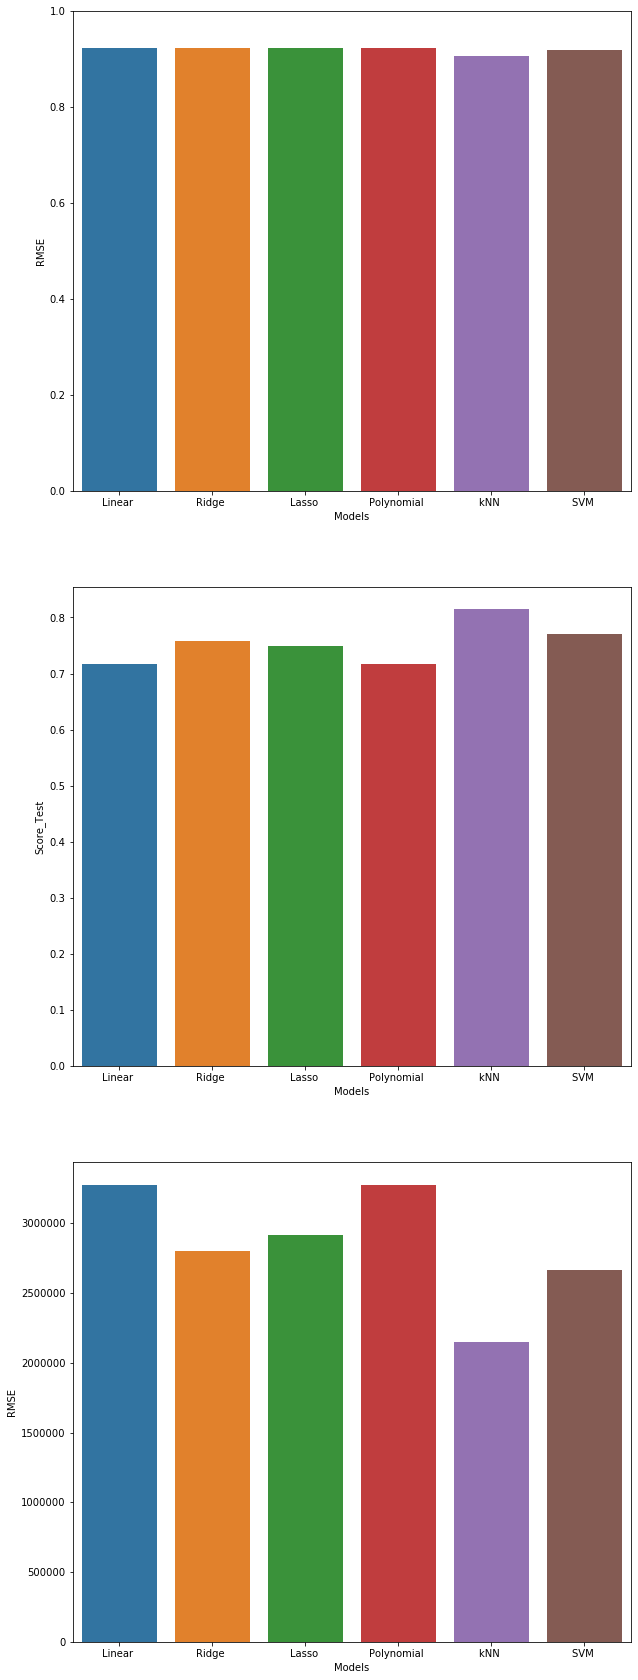

In [135]:
f, axes = plt.subplots(3,1, figsize=(10, 30))
sns.barplot(x='Models', y='Score_Train', data = stats, ax = axes[0])
axes[0].set_xlabel('Models')
axes[0].set_ylabel('Score_Train')
axes[0].set_ylim(0,1.0)

sns.barplot(x='Models', y='Score_Test', data = stats, ax = axes[1])
axes[0].set_xlabel('Models')
axes[0].set_ylabel('Score_Test')
axes[0].set_ylim(0,1.0)

sns.barplot(x='Models', y='RMSE', data = stats, ax = axes[2])
axes[0].set_xlabel('Models')
axes[0].set_ylabel('RMSE')
axes[0].set_ylim(0,1.0)

In [136]:
from IPython.display import display, Javascript
display(Javascript("""
require(
    ["base/js/dialog"], 
    function(dialog) {
        dialog.modal({
            title: 'Part_1_Regression Summary',
            body: 'Looking at the RMSE scores plot, Best model is Linear Regression with test predictin score of 0.86227',
            buttons: {
                'Best Model is Linear': {}
            }
        });
    })
"""))

<IPython.core.display.Javascript object>